<a href="https://colab.research.google.com/github/aoc-ptctech/allinone2022/blob/main/jcplessis/Day_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import re, sys

REGEX = re.compile("Sensor at x=(\-?\d+), y=(\-?\d+): closest beacon is at x=(\-?\d+), y=(\-?\d+)")

class Sensor:
  def __init__(self, input):
    self.x, self.y, self.bx, self.by = [int(z) for z in REGEX.match(input).groups()]

  def get_range(self, y):
    distance = abs(self.x - self.bx) + abs(self.y - self.by)
    vertical_distance = abs(self.y - y)
    distance_left = distance - vertical_distance
    if distance_left < 0:
      return None
    else:
      return (self.x-distance_left, self.x+distance_left)

  def polygon_coords(self):
    distance = abs(self.x - self.bx) + abs(self.y - self.by)
    return [
        [self.x-distance, self.y], 
        [self.x, self.y-distance], 
        [self.x+distance, self.y], 
        [self.x, self.y+distance]
    ]

class Tunnels:
  def __init__(self, input):
    self.sensors = []
    self.min_x = sys.maxsize
    self.max_x = -1*sys.maxsize
    self.min_y = sys.maxsize
    self.max_y = -1*sys.maxsize
    for line in input.split("\n"):
      s = Sensor(line)
      for x, y in s.polygon_coords():
        self.min_x = min(self.min_x, x)
        self.max_x = max(self.max_x, x)
        self.min_y = min(self.min_y, y)
        self.max_y = max(self.max_y, y)
      self.sensors.append(s)

  def is_covered(self, x, ranges):
    for range in ranges:
        if range != None:
          s_min_x, s_max_x = range
          if s_min_x <= x and x <= s_max_x:
            return range
    return None

  def is_beacon(self, x, y):
    for sensor in self.sensors:
      if sensor.bx == x and sensor.by == y:
        return True
    return False

  def count_no_distress_beacon(self, y):
    result = 0
    ranges = [sensor.get_range(y) for sensor in self.sensors]
    for x in range(self.min_x, self.max_x+1):
      covering_range = self.is_covered(x, ranges)
      if covering_range != None and not self.is_beacon(x, y):
        result += 1
    return result

  def find_distress_beacon(self, min_coord, max_coord):
    for y in range(min_coord, max_coord):
      ranges = [sensor.get_range(y) for sensor in self.sensors]
      x = min_coord
      while x <= max_coord:
        covering_range = self.is_covered(x, ranges)
        if covering_range == None:
          return (x, y)
        x = covering_range[1] + 1

  def tuning_frequency(self, min_coord, max_coord):
    x, y = self.find_distress_beacon(min_coord, max_coord)
    return x*4000000 + y



In [197]:
import unittest

example = """Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3"""

class TestAcceptance(unittest.TestCase):

    def test_parse(self):
      sensor = Sensor("Sensor at x=-14, y=17: closest beacon is at x=10, y=16")
      self.assertEqual(-14, sensor.x)
      self.assertEqual(17, sensor.y)
      self.assertEqual(10, sensor.bx)
      self.assertEqual(16, sensor.by)

    def test_get_range(self):
      sensor = Sensor("Sensor at x=8, y=7: closest beacon is at x=2, y=10")
      self.assertEqual((-1, 17), sensor.get_range(7))
      self.assertEqual((2, 14), sensor.get_range(10))
      self.assertEqual((8, 8), sensor.get_range(-2))
      self.assertEqual(None, sensor.get_range(17))

    def test_dimensions(self):
      tunnels = Tunnels(example)
      self.assertEqual(-8, tunnels.min_x)
      self.assertEqual(28, tunnels.max_x)
      self.assertEqual(0, tunnels.min_y)
      self.assertEqual(22, tunnels.max_y)

    def test_count_no_distress_beacon(self):
      tunnels = Tunnels(example)
      self.assertEqual(25, tunnels.count_no_distress_beacon(9))
      self.assertEqual(26, tunnels.count_no_distress_beacon(10))
      self.assertEqual(28, tunnels.count_no_distress_beacon(11))
    
    def test_find_distress_beacon(self):
      tunnels = Tunnels(example)
      self.assertEqual((14, 11), tunnels.find_distress_beacon(0, 20))
      self.assertEqual(56000011, tunnels.tuning_frequency(0, 20))
      
      

unittest.main(argv=[''], verbosity=2, exit=False)

test_count_no_distress_beacon (__main__.TestAcceptance) ... ok
test_dimensions (__main__.TestAcceptance) ... FAIL
test_find_distress_beacon (__main__.TestAcceptance) ... ok
test_get_range (__main__.TestAcceptance) ... ok
test_parse (__main__.TestAcceptance) ... ok

FAIL: test_dimensions (__main__.TestAcceptance)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-197-6125c1757d78>", line 38, in test_dimensions
    self.assertEqual(0, tunnels.min_y)
AssertionError: 0 != -10

----------------------------------------------------------------------
Ran 5 tests in 0.019s

FAILED (failures=1)


In [198]:
#@title Define my input
input = """Sensor at x=1943362, y=12808: closest beacon is at x=1861152, y=-42022
Sensor at x=906633, y=3319637: closest beacon is at x=2096195, y=3402757
Sensor at x=2358896, y=2158796: closest beacon is at x=2331052, y=2934800
Sensor at x=1787606, y=3963631: closest beacon is at x=2096195, y=3402757
Sensor at x=2282542, y=3116014: closest beacon is at x=2331052, y=2934800
Sensor at x=173912, y=1873897: closest beacon is at x=429790, y=2000000
Sensor at x=3391153, y=3437167: closest beacon is at x=3720655, y=3880705
Sensor at x=3834843, y=2463103: closest beacon is at x=2971569, y=2563051
Sensor at x=3917316, y=3981011: closest beacon is at x=3720655, y=3880705
Sensor at x=1466100, y=1389028: closest beacon is at x=429790, y=2000000
Sensor at x=226600, y=3967233: closest beacon is at x=85598, y=4102832
Sensor at x=1757926, y=2834180: closest beacon is at x=2331052, y=2934800
Sensor at x=2176953, y=3240563: closest beacon is at x=2096195, y=3402757
Sensor at x=2883909, y=2533883: closest beacon is at x=2971569, y=2563051
Sensor at x=376161, y=2533578: closest beacon is at x=429790, y=2000000
Sensor at x=3015271, y=3913673: closest beacon is at x=3720655, y=3880705
Sensor at x=490678, y=388548: closest beacon is at x=429790, y=2000000
Sensor at x=2725765, y=2852933: closest beacon is at x=2331052, y=2934800
Sensor at x=86373, y=2839828: closest beacon is at x=429790, y=2000000
Sensor at x=1802070, y=14830: closest beacon is at x=1861152, y=-42022
Sensor at x=19628, y=1589839: closest beacon is at x=429790, y=2000000
Sensor at x=2713787, y=3381887: closest beacon is at x=2096195, y=3402757
Sensor at x=2148471, y=3729393: closest beacon is at x=2096195, y=3402757
Sensor at x=3999318, y=3263346: closest beacon is at x=3720655, y=3880705
Sensor at x=575700, y=1390576: closest beacon is at x=429790, y=2000000
Sensor at x=273266, y=2050976: closest beacon is at x=429790, y=2000000
Sensor at x=3008012, y=993590: closest beacon is at x=2971569, y=2563051
Sensor at x=3306379, y=2782128: closest beacon is at x=2971569, y=2563051
Sensor at x=44975, y=3820788: closest beacon is at x=85598, y=4102832
Sensor at x=2941700, y=2536797: closest beacon is at x=2971569, y=2563051
Sensor at x=2040164, y=102115: closest beacon is at x=1861152, y=-42022
Sensor at x=3928008, y=3692684: closest beacon is at x=3720655, y=3880705
Sensor at x=3905950, y=222812: closest beacon is at x=4759853, y=-796703"""


In [199]:
tunnels = Tunnels(input)

print(f"In my tunnels there are {tunnels.count_no_distress_beacon(2000000)} positions that cannot contain a beacon at y=2000000.")
print(f"In my tunnels the tunning frequency is {tunnels.tuning_frequency(3000000, 4000000)}.")


In my tunnels there are 4725496 positions that cannot contain a beacon at y=2000000.
In my tunnels the tunning frequency is 12051287042458.


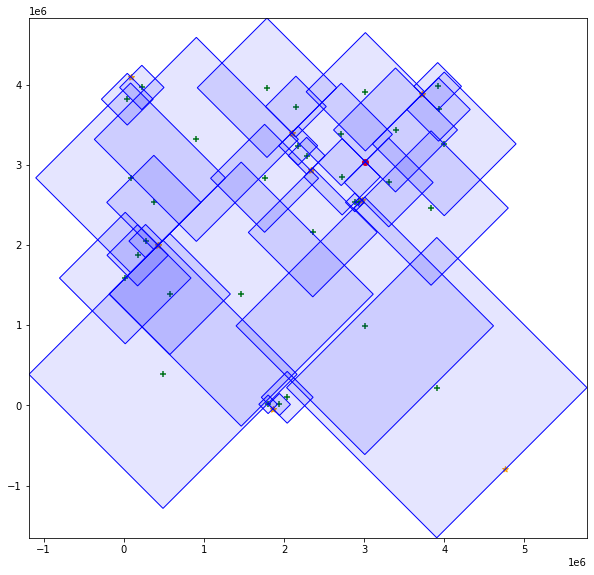

In [200]:
#@title Représentation de la grotte
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

tunnels = Tunnels(input)

ax = plt.gca()
ax.set_aspect('equal', 'box')
ax.set_xlim(tunnels.min_x, tunnels.max_x)
ax.set_ylim(tunnels.min_y, tunnels.max_y)
for sensor in tunnels.sensors:
  pts = np.array(sensor.polygon_coords())
  p = Polygon(pts, fill=False, edgecolor="blue")
  ax.add_patch(p)
  p = Polygon(pts, fill=True, facecolor="blue", alpha=0.1)
  ax.add_patch(p)

for sensor in tunnels.sensors:
  plt.scatter(sensor.x, sensor.y, color="green", marker="+")
  plt.scatter(sensor.bx, sensor.by, color="orange", marker="*")

distress_x, distress_y = tunnels.find_distress_beacon(3000000, 3100000)
plt.scatter(distress_x, distress_y, color="red", marker="o")

plt.rcParams["figure.figsize"] = (10,10)
plt.show()
